In [1]:
import os
import csv
import matplotlib.pyplot as plt  # plotting
import numpy as np  # numerics
from skimage import io
from natsort import natsorted
#import skimage.io
import skimage.color
import skimage.morphology
import skimage.measure as sm

from skimage.io import imread
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from skimage import (io, filters,  morphology, measure, segmentation, feature, util, exposure)
from scipy.ndimage import gaussian_filter 
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom


In [2]:
#define two folder paths - for September 2023 and October 2023 
folder_path_september = './HoloMonitor Beta TIFF/September 2023/MDCK Edna_06.09.23-B1-1_100ul'
folder_path_october = './HoloMonitor Beta TIFF/October 2023/MDCK 17.10.23/B2-1'


In [3]:
list_files_september = [os.path.join(folder_path_september, f) for f in os.listdir(folder_path_september)]
list_files_september = natsorted(list_files_september)
image_list_september = []

#open all images in the stack
for filename in list_files_september:
    image_list_september.append(io.imread(filename))
    

In [4]:
list_files_october = [os.path.join(folder_path_october, f) for f in os.listdir(folder_path_october)]
list_files_october = natsorted(list_files_october)
image_list_october = []

#open all images in the stack
for filename in list_files_october:
    image_list_october.append(io.imread(filename))
    

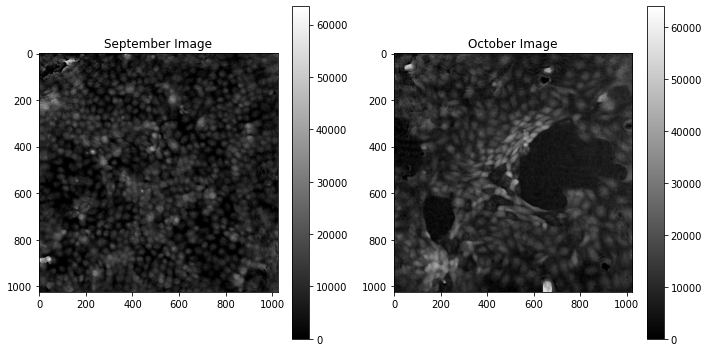

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

im1 = ax[0].imshow(image_list_september[0], cmap='gray')
cbar1 = fig.colorbar(im1, ax=ax[0])
ax[0].set_title('September Image')

im2 = ax[1].imshow(image_list_october[0], cmap='gray')
cbar2 = fig.colorbar(im2, ax=ax[1])
ax[1].set_title('October Image')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()


In [6]:
csv_file_path_september = 'September_2023_MDCK_Edna_06.09.23-B1-1_100ul_minmaxvalues_rawHM.csv'
csv_file_path_october = 'MDCK_17.10.23_B2-1_minmaxvalues_rawHM.csv' 

In [7]:
min_values_september = []
max_values_september = []

# Read the CSV file
with open(csv_file_path_september, 'r') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)
    
    # Skip the header row if it exists
    header = next(csv_reader, None)
    
    # Iterate through the rows and extract data
    for row in csv_reader:
        min_values_september.append(float(row[0]))
        max_values_september.append(float(row[1]))
        
min_values_september = np.array(min_values_september)
max_values_september = np.array(max_values_september)

In [8]:
min_values_september = min_values_september * 15.875

In [9]:
max_values_september = max_values_september * 15.875

In [10]:
min_values_october = []
max_values_october = []

# Read the CSV file
with open(csv_file_path_october, 'r') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)
    
    # Skip the header row if it exists
    header = next(csv_reader, None)
    
    # Iterate through the rows and extract data
    for row in csv_reader:
        min_values_october.append(float(row[0]))
        max_values_october.append(float(row[1]))
        
min_values_october = np.array(min_values_october)
max_values_october= np.array(max_values_october)

In [11]:
min_values_october = min_values_october * 15.875

In [12]:
max_values_october = max_values_october * 15.875

In [38]:
unique_min_values_september = np.sort(np.unique(min_values_september))
unique_min_values_october = np.sort(np.unique(min_values_october))

print(unique_min_values_september)
#find which indices the unique_min_values_september correspond to in the September csv document 
indices_september = [] 
for i in range(len(unique_min_values_september)):
    indices_september.append(np.where(min_values_september == unique_min_values_september[i])[0][0])
    
print(indices_september)

#check that the indices correspond to the correct values
for i in range(len(indices_september)):
    print(min_values_september[indices_september[i]])

[-32.104584   -24.34521738 -22.80281825 -22.73773075 -19.990562
 -17.2022135   -2.00000076]
[195, 81, 217, 136, 253, 250, 0]
-32.104584
-24.345217375
-22.80281825
-22.73773075
-19.990561999999997
-17.2022135
-2.0000007625


In [44]:
print(min_values_september[indices_september[0]])

-32.104584


Text(0.5, 1.0, 'September Image 6, min value = -17.2022135')

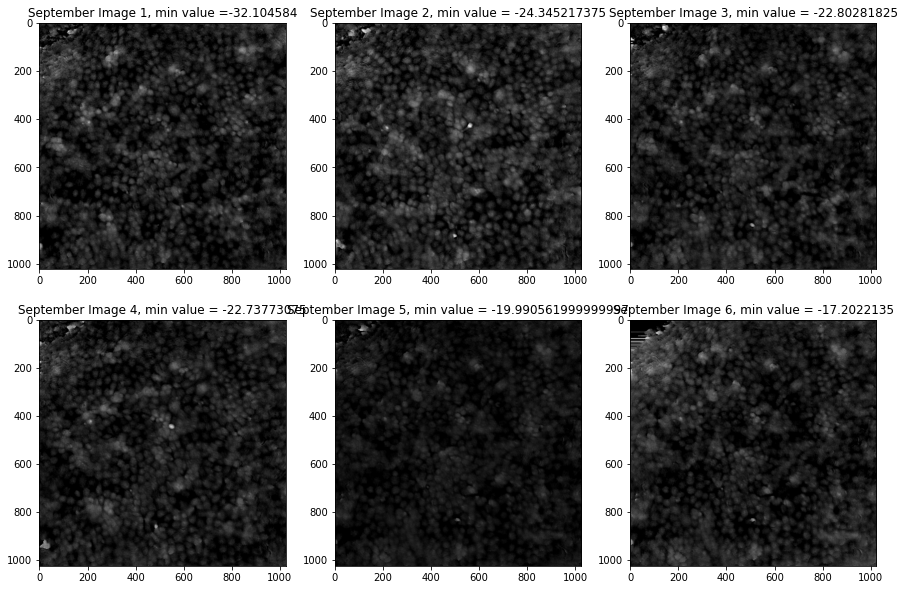

In [48]:
#visualise the images corresponding to the indices from September image stack 
#visualise 6 images 
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.ravel()
ax[0].imshow(image_list_september[indices_september[0]], cmap='gray')
ax[0].set_title('September Image 1, min value =' + str(min_values_september[indices_september[0]]))
ax[1].imshow(image_list_september[indices_september[1]], cmap='gray')
ax[1].set_title('September Image 2, min value = ' + str(min_values_september[indices_september[1]]))
ax[2].imshow(image_list_september[indices_september[2]], cmap='gray')
ax[2].set_title('September Image 3, min value = ' + str(min_values_september[indices_september[2]]))
ax[3].imshow(image_list_september[indices_september[3]], cmap='gray')
ax[3].set_title('September Image 4, min value = ' + str(min_values_september[indices_september[3]]))
ax[4].imshow(image_list_september[indices_september[4]], cmap='gray')
ax[4].set_title('September Image 5, min value = ' + str(min_values_september[indices_september[4]]))
ax[5].imshow(image_list_september[indices_september[5]], cmap='gray')
ax[5].set_title('September Image 6, min value = ' + str(min_values_september[indices_september[5]]))



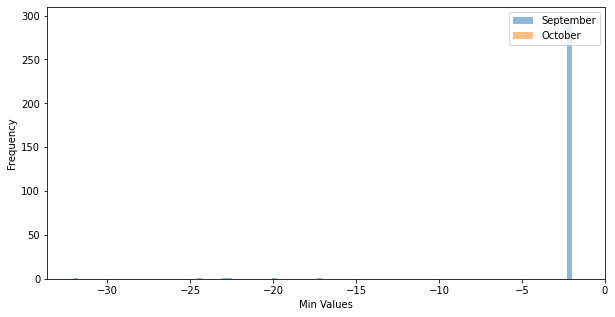

In [32]:
#analyse data distribution 
plt.figure(figsize=(10, 5))
plt.hist(min_values_september, bins=100, alpha=0.5, label='September')
plt.hist(min_values_october, bins=100, alpha=0.5, label='October')
plt.legend(loc='upper right')
plt.xlabel('Min Values')
plt.ylabel('Frequency')
plt.show()

In [17]:
delta_I = 65535
zeta_min_september = np.min(min_values_september)
delta_zeta_i_september = max_values_september - min_values_september

I_hat_0_september = ( (image_list_september[0]/delta_I) * delta_zeta_i_september[0] + zeta_min_september - min_values_september[0] ) #*1000 #scaled to nanometers for the first image in the stack


In [28]:
print(zeta_min_september)
print(np.min(min_values_september))

-32.104584
-32.104584


In [22]:
print(I_hat_0_september)

[[-29.14965673 -28.341642   -27.23980373 ... -25.69723015 -24.9626713
  -23.42009772]
 [-29.8107597  -29.07620085 -27.53362727 ... -24.88921541 -24.52193599
  -23.64046537]
 [-29.88421558 -29.59039204 -28.56200966 ... -24.37502422 -24.37502422
  -24.22811245]
 ...
 [-29.22311262 -29.22311262 -29.22311262 ... -26.28487723 -26.50524488
  -26.50524488]
 [-29.22311262 -29.2965685  -29.37002439 ... -26.06450957 -25.9175978
  -25.77068603]
 [-29.00274496 -29.14965673 -29.2965685  ... -25.99105369 -25.55031838
  -25.03612718]]


In [19]:
delta_I = 65535
zeta_min_october = np.min(min_values_october)
delta_zeta_i_october = max_values_october - min_values_october

I_hat_0_october = ( (image_list_october[0]/delta_I) * delta_zeta_i_october[0] + zeta_min_october - min_values_october[0] ) #*1000 #scaled to nanometers for the first image in the stack


In [27]:
print(zeta_min_october)

-2.0000007625


In [20]:
print(I_hat_0_october)

[[3.33942249 3.33942249 3.26352653 ... 5.3127176  5.00913374 4.47786198]
 [3.33942249 3.26352653 3.1117346  ... 5.5404055  5.16092567 4.62965391]
 [3.33942249 3.1117346  2.80815073 ... 5.0850297  4.78144584 4.47786198]
 ...
 [1.59381528 1.51791931 1.66971125 ... 1.97329511 2.20098301 2.6563588 ]
 [1.59381528 1.36612738 1.51791931 ... 1.66971125 1.89739914 2.35277494]
 [1.59381528 1.13843949 1.21433545 ... 1.44202335 1.59381528 2.04919107]]


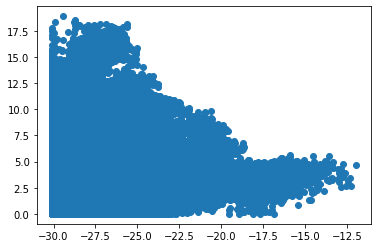

In [24]:
plt.scatter(I_hat_0_september, I_hat_0_october)